# PCA->k-means Image Classifier: Step 1b

In [1]:
#%load_ext autotime
#%load_ext autoreload
#%autoreload 2

import joblib

from cls import *

Welcome to eht-imaging! v 1.2.4 



## Load the Data

In [2]:
imgs = joblib.load('imgs.joblib')

In [3]:
keys = list(imgs.keys())

In [4]:
vecs = np.array([img.flatten() for f, img in imgs.items()])
vecs_centered  = vecs - vecs.mean(axis=0)
vecs_centered -= vecs_centered.mean(axis=1).reshape(vecs.shape[0], -1)

In [5]:
joblib.dump(keys,          'keys.joblib')
joblib.dump(vecs_centered, 'vecs.joblib')

['vecs.joblib']

In [6]:
ehtims  = {f:img for f, img in imgs.items() if '3599/'  in f}
smilis  = {f:img for f, img in imgs.items() if 'smili_static/'  in f}
difmaps = {f:img for f, img in imgs.items() if 'difmap_static/' in f}

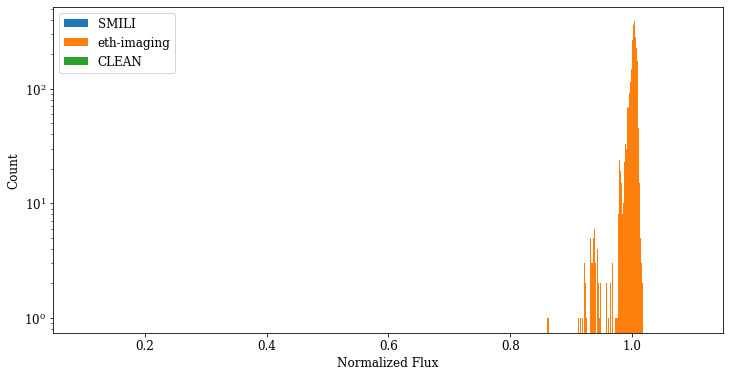

In [7]:
imgs_mean = [np.mean(img) for img in imgs.values()]
imgs_mean_mean = np.mean(imgs_mean)

plt.rcParams["figure.figsize"] = (12,6)
plt.hist([np.mean(img)/imgs_mean_mean for img in smilis.values()],  np.arange(0.1,1.1,0.001), label='SMILI')
plt.hist([np.mean(img)/imgs_mean_mean for img in ehtims.values()],  np.arange(0.1,1.1,0.001), label='eth-imaging')
plt.hist([np.mean(img)/imgs_mean_mean for img in difmaps.values()], np.arange(0.1,1.1,0.001), label='CLEAN')
plt.xlabel('Normalized Flux')
plt.ylabel('Count')
plt.yscale('log')
plt.legend()

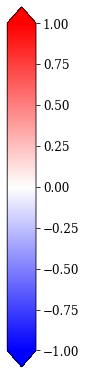

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(0.4, 5))
ax1 = fig.add_axes([0,0,1,1])

cmap = copy(plt.get_cmap('bwr'))
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
    
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                # to use 'extend', you must
                                # specify two extra boundaries:
                                extend='both',
                                spacing='proportional')                          

plt.show()

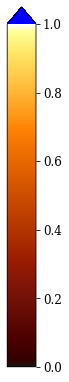

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(0.4, 5))
ax1 = fig.add_axes([0,0,1,1])

cmap = copy(plt.get_cmap('afmhot_10us'))
cmap.set_over('b')
norm = mpl.colors.Normalize(vmin=0, vmax=1)
    
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                # to use 'extend', you must
                                # specify two extra boundaries:
                                extend='max',
                                spacing='proportional')                          

plt.show()